In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
# Load the dataset
file_path = 'balanced_hatespeech_dataset.csv'
df = pd.read_csv(file_path) 

# Separate features and target

In [3]:
# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

In [4]:
# Encode categorical labels if needed
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
# Sample a smaller subset of the data for feature selection
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)

In [6]:
# Select the top 20 features using mutual information on the sample
selector = SelectKBest(mutual_info_classif, k=20)
X_sample_new = selector.fit_transform(X_sample, y_sample)

In [7]:
# Transform the full dataset using the fitted selector
X_new = selector.transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Normalize the data

In [9]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model

In [10]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Fit the model on the training data

LinearRegression()

# Predict on the test set

In [11]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate mean squared error (MSE) as a measure of performance

In [12]:
# Calculate mean squared error (MSE) as a measure of performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.2415188450377087


MSE of 0.2415188450377087 indicates that your Linear Regression model, on average, makes predictions that are close to the actual values by this squared difference metric. Lower MSE values generally indicate better model accuracy and performance in regression tasks.

# Plot the mean squared error

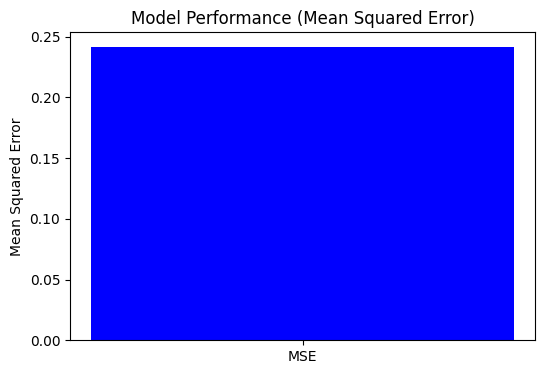

In [13]:
# Plot the mean squared error
plt.figure(figsize=(6, 4))
plt.bar(['MSE'], [mse], color='blue')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance (Mean Squared Error)')
plt.show()